In [8]:
import dill
dill.load_session('ch10ann.db')

Creating a single Threshold Linear Unit (TLU) which is known as a perceptron

In [9]:
import numpy as np
from sklearn.datasets import load_iris
from sklearn.linear_model import Perceptron

iris = load_iris()

X = iris.data[:, (2,3)] #petal length, petal width
y = (iris.target == 0).astype(np.int)

per_clf = Perceptron()
per_clf.fit(X, y)

y_pred = per_clf.predict([[2, 0.5]])
print('Predicted', y_pred)

Predicted [0]


In [5]:
import tensorflow as tf
from tensorflow import keras

print('Tensorflow version: ',tf.__version__)
print('Keras version: ',keras.__version__)

Tensorflow version:  2.1.0
Keras version:  2.2.4-tf


Image classification using Fashion Mnist, this is different from Mnist as Mnist was digits [0,1,2,3,4,5...9] whereas Fashion Mnist is clothing: Tshirt, trouser, pullover etc]

In [78]:
fashion_mnist = keras.datasets.fashion_mnist
(X_train_full, y_train_full), (X_test, y_test) = fashion_mnist.load_data()

In [16]:
X_train_full.shape
#You have 60000 28 by 28 elements in teh array

(60000, 28, 28)

In [17]:
X_train_full.dtype

dtype('uint8')

In [80]:
#Scaling the pixel intensities, since all are from 0 to 255 -> 0 to 1, also creating a validation set
X_valid, X_train = X_train_full[:5000]/255.0, X_train_full[5000:]/255.0
y_valid, y_train = y_train_full[:5000], y_train_full[5000:]
X_test = X_test/255.0

In [32]:
y_train

array([4, 0, 7, ..., 3, 0, 5], dtype=uint8)

In [23]:
class_names = ["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat", "Sandal", "Shirt", "Sneaker", "Bag", 
               "Ankle boot"]

In [29]:
class_names[y_train[0]]

'Coat'

In [35]:
#Now lets build our MLP
model = keras.models.Sequential()
model.add(keras.layers.Flatten(input_shape=[28,28])) #Convert input to a 1D array
model.add(keras.layers.Dense(300, activation="relu")) #300 Neurons with Relu activation function
model.add(keras.layers.Dense(100, activation="relu"))
model.add(keras.layers.Dense(10, activation="softmax"))

#All of this can also be parsed as paramters inside Sequential
#model = keras.models.Sequential([
#    keras.layers.Flatten(input_shape=[28,28]),
#    keras.layers.Dense(300, activation="relu"),
#    keras.layers.Dense(100, activation="relu"),
#    keras.layers.Dense(10, activation="softmax")
#])

In [38]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 300)               235500    
_________________________________________________________________
dense_1 (Dense)              (None, 100)               30100     
_________________________________________________________________
dense_2 (Dense)              (None, 10)                1010      
Total params: 266,610
Trainable params: 266,610
Non-trainable params: 0
_________________________________________________________________


In [39]:
model.layers

In [41]:
hidden1 = model.layers[1]
hidden1.name

'dense'

In [43]:
model.get_layer('dense') is hidden1

True

In [45]:
weights, biases = hidden1.get_weights()
weights

array([[ 0.00064065, -0.05406202,  0.06755719, ...,  0.04977856,
         0.0735604 ,  0.00520879],
       [ 0.03916007,  0.05973338, -0.02302288, ...,  0.06761892,
         0.06866913,  0.00079568],
       [ 0.06503299, -0.05525991,  0.05248441, ..., -0.01200636,
        -0.01764258, -0.03057273],
       ...,
       [-0.0018555 , -0.02894144, -0.06312636, ..., -0.07225871,
         0.05890697,  0.00673521],
       [ 0.03758623,  0.02471546, -0.02648306, ..., -0.07403474,
        -0.07191742,  0.0514216 ],
       [-0.00858812,  0.02415555,  0.02097904, ..., -0.03425112,
        -0.05430547, -0.02035681]], dtype=float32)

In [46]:
weights.shape

(784, 300)

In [47]:
biases

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0.

In [48]:
biases.shape

(300,)

In [55]:
model.compile(loss="sparse_categorical_crossentropy", optimizer="sgd", metrics=["accuracy"])
#Can also use other ones which is the same and do not have to write the actual word for instance
# sgd = keras.optimizers.SGD(), default learning rate = 0.01
# Using sparse becuase we have 1 to 9 and it has not been one hot encoded
# Can be converted have to use keras.utils.to_categorical()

In [56]:
history = model.fit(X_train, y_train, epochs=30, validation_data=(X_valid, y_valid))
# Can also use validation split = 0.1 which tells keras to use the last 10% of the data (before shuffling) for validation.

Train on 55000 samples, validate on 5000 samples
Epoch 1/30
55000/55000 [==============================] - 4s 75us/sample - loss: 0.1372 - accuracy: 0.9511 - val_loss: 0.3114 - val_accuracy: 0.8964
Epoch 2/30
55000/55000 [==============================] - 4s 71us/sample - loss: 0.1340 - accuracy: 0.9528 - val_loss: 0.3108 - val_accuracy: 0.9004
Epoch 3/30
55000/55000 [==============================] - 4s 70us/sample - loss: 0.1334 - accuracy: 0.9534 - val_loss: 0.3062 - val_accuracy: 0.8952
Epoch 4/30
55000/55000 [==============================] - 4s 70us/sample - loss: 0.1304 - accuracy: 0.9546 - val_loss: 0.3128 - val_accuracy: 0.8958
Epoch 5/30
55000/55000 [==============================] - 4s 72us/sample - loss: 0.1281 - accuracy: 0.9545 - val_loss: 0.3118 - val_accuracy: 0.8990
Epoch 6/30
55000/55000 [==============================] - 4s 72us/sample - loss: 0.1260 - accuracy: 0.9558 - val_loss: 0.3192 - val_accuracy: 0.8974
Epoch 7/30
55000/55000 [==============================] -

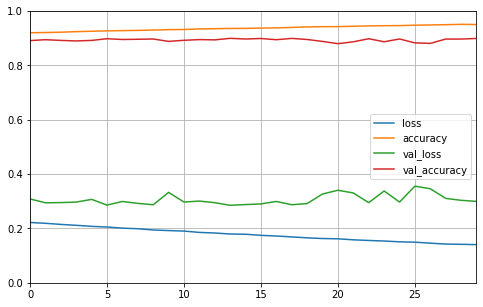

In [53]:
import pandas as pd
import matplotlib.pyplot as plt

pd.DataFrame(history.history).plot(figsize=(8,5))
plt.grid(True)
plt.gca().set_ylim(0,1) #Set the vertical range from 0 to 1
plt.show()

In [82]:
model.evaluate(X_test,y_test)

10000/10000 [==============================] - 0s 39us/sample - loss: 0.3764 - accuracy: 0.8873


[0.37639594252556563, 0.8873]

In [83]:
X_new = X_test[:3]
y_proba = model.predict(X_new)
y_proba.round(2)

array([[0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 1.  ],
       [0.  , 0.  , 0.99, 0.  , 0.01, 0.  , 0.  , 0.  , 0.  , 0.  ],
       [0.  , 1.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ]],
      dtype=float32)

In [86]:
y_pred = model.predict_classes(X_new)
print("Predicted classes: ", y_pred)
print(np.array(class_names)[y_pred])

Predicted classes:  [9 2 1]
['Ankle boot' 'Pullover' 'Trouser']


Doing a MLP for a regression dataset

In [93]:
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

housing = fetch_california_housing()

X_train_full, X_test, y_train_full, y_test = train_test_split(housing.data, housing.target)
X_train, X_valid, y_train, y_valid = train_test_split(X_train_full, y_train_full)

In [101]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train) # Have to do this first for the scaler to understand the data
X_valid = scaler.transform(X_valid)
X_test = scaler.transform(X_test)

In [104]:
model = keras.models.Sequential([
    keras.layers.Dense(30, activation=keras.activations.relu, input_shape=X_train.shape[1:]),
    keras.layers.Dense(1) #output layer
])

model.compile(loss=keras.metrics.mean_squared_error, optimizer=keras.optimizers.SGD())

In [105]:
history = model.fit(X_train, y_train, epochs=20, validation_data=(X_valid, y_valid))

Train on 11610 samples, validate on 3870 samples
Epoch 1/20
11610/11610 [==============================] - 1s 63us/sample - loss: 0.8158 - val_loss: 0.5936
Epoch 2/20
11610/11610 [==============================] - 1s 43us/sample - loss: 1.0327 - val_loss: 0.5235
Epoch 3/20
11610/11610 [==============================] - 1s 45us/sample - loss: 0.4405 - val_loss: 0.4457
Epoch 4/20
11610/11610 [==============================] - 1s 45us/sample - loss: 0.3980 - val_loss: 0.4302
Epoch 5/20
11610/11610 [==============================] - 0s 42us/sample - loss: 0.3977 - val_loss: 0.4285
Epoch 6/20
11610/11610 [==============================] - 1s 43us/sample - loss: 0.4260 - val_loss: 0.4650
Epoch 7/20
11610/11610 [==============================] - 0s 42us/sample - loss: 0.4070 - val_loss: 0.4298
Epoch 8/20
11610/11610 [==============================] - 0s 42us/sample - loss: 0.3817 - val_loss: 0.4221
Epoch 9/20
11610/11610 [==============================] - 0s 42us/sample - loss: 0.3728 - val_l

In [106]:
mse_test = model.evaluate(X_test, y_test)

5160/5160 [==============================] - 0s 24us/sample - loss: 0.3544


In [112]:
X_new = X_test[:3]
y_pred = model.predict(X_new)
print("The predicted is: ", y_pred)
print("The actual values are: ", y_test[:3])

The predicted is:  [[1.1735533 ]
 [0.81437635]
 [1.8515328 ]]
The actual values are:  [1.375 0.699 1.688]


There is another form of a neural network called wide and deep, where in the wide it goes from one layer straight to the output and deep means it goes through all the layers.

In [113]:
input_ = keras.layers.Input(shape=X_train.shape[1:])
hidden1 = keras.layers.Dense(30, activation=keras.activations.relu)(input_) # Functional API, telling keras how to connect the layers together
hidden2 = keras.layers.Dense(30, activation=keras.activations.relu)(hidden1)
concat = keras.layers.Concatenate()([input_,hidden2])
output = keras.layers.Dense(1)(concat)
model = keras.Model(inputs=[input_], outputs=[output])

However what happens if we want to split the features through the wide path and then through the deep path. Use a subset of features for the one path and a second subset for the next path.

In [114]:
input_A = keras.layers.Input(shape=[5], name="wide_input")
input_B = keras.layers.Input(shape=[6], name="deep_input")
hidden1 = keras.layers.Dense(30, activation=keras.activations.relu)(input_B)
hidden2 = keras.layers.Dense(30, activation=keras.activations.relu)(hidden1)
concat = keras.layers.concatenate([input_A, hidden2])
output = keras.layers.Dense(1, name="output")(concat)
model = keras.Model(inputs=[input_A, input_B], outputs=[output])

In [115]:
X_train[:,2:]

array([[ 0.4432588 , -0.18146758,  0.14658918, -0.00668425, -1.30602918,
         1.19403516],
       [ 0.02243357, -0.07394808,  3.97718582,  0.06524645,  1.03325755,
        -0.86489745],
       [ 0.49638274, -0.15580488, -0.52270705, -0.08633485, -0.93099323,
         0.82833666],
       ...,
       [-0.45379735, -0.16914238,  0.4076059 ,  0.02796317, -1.36697252,
         1.2341117 ],
       [-0.10269501, -0.02855418, -0.88513229, -0.12211768,  2.55215315,
        -2.29763401],
       [-0.44231162,  0.01946478, -0.18673622,  0.00760211, -0.7575391 ,
         0.64298263]])

In [116]:
X_train[:,:5]

array([[ 0.79641367, -0.37370348,  0.4432588 , -0.18146758,  0.14658918],
       [-0.10858498, -1.48584374,  0.02243357, -0.07394808,  3.97718582],
       [ 1.73179495, -0.05594913,  0.49638274, -0.15580488, -0.52270705],
       ...,
       [-1.2989785 , -0.53258066, -0.45379735, -0.16914238,  0.4076059 ],
       [-0.4427939 ,  0.26180523, -0.10269501, -0.02855418, -0.88513229],
       [-1.33541641,  1.13562972, -0.44231162,  0.01946478, -0.18673622]])

With this, however you would need to pass in multiple values for X_train and X_test etc => Call it X_train_A, X_train_B

In [117]:
model.compile(loss=keras.metrics.mean_squared_error, optimizer=keras.optimizers.SGD(lr=1e-3))

X_train_A, X_train_B = X_train[:, :5], X_train[:, 2:]
X_valid_A, X_valid_B = X_valid[:, :5], X_valid[:, 2:]
X_test_A, X_test_B = X_test[:, :5], X_test[:, 2:]
X_new_A, X_new_B = X_test_A[:3], X_test_B[:3]

In [118]:
history = model.fit((X_train_A, X_train_B), y_train, epochs=20, validation_data=((X_valid_A, X_valid_B),y_valid))

Train on 11610 samples, validate on 3870 samples
Epoch 1/20
11610/11610 [==============================] - 1s 67us/sample - loss: 2.0047 - val_loss: 0.9863
Epoch 2/20
11610/11610 [==============================] - 1s 46us/sample - loss: 0.8285 - val_loss: 0.7748
Epoch 3/20
11610/11610 [==============================] - 1s 48us/sample - loss: 0.7054 - val_loss: 0.7131
Epoch 4/20
11610/11610 [==============================] - 1s 47us/sample - loss: 0.6577 - val_loss: 0.6797
Epoch 5/20
11610/11610 [==============================] - 1s 47us/sample - loss: 0.6293 - val_loss: 0.6598
Epoch 6/20
11610/11610 [==============================] - 1s 46us/sample - loss: 0.6057 - val_loss: 0.6353
Epoch 7/20
11610/11610 [==============================] - 1s 46us/sample - loss: 0.5877 - val_loss: 0.6192
Epoch 8/20
11610/11610 [==============================] - 1s 45us/sample - loss: 0.5703 - val_loss: 0.6045
Epoch 9/20
11610/11610 [==============================] - 1s 45us/sample - loss: 0.5576 - val_l

In [119]:
mse_test = model.evaluate((X_test_A, X_test_B), y_test)
y_pred = model.predict((X_new_A, X_new_B))

5160/5160 [==============================] - 0s 26us/sample - loss: 0.4718


If need be you could have multiple outputs, can be one for classification or something to see that your model is actually learning something

In [121]:
output = keras.layers.Dense(1, name="main_output")(concat)
aux_output = keras.layers.Dense(1, name="aux_output")(hidden2)
model = keras.Model(inputs=[input_A, input_B], outputs=[output, aux_output])

In [122]:
model.compile(loss=[keras.metrics.mse, keras.metrics.mse], loss_weights=[0.9, 0.1], optimizer=keras.optimizers.SGD())

In [123]:
history = model.fit([X_train_A, X_train_B],[y_train, y_train], epochs=20, validation_data=([X_valid_A, X_valid_B],[y_valid, y_valid]))

Train on 11610 samples, validate on 3870 samples
Epoch 1/20
11610/11610 [==============================] - 1s 94us/sample - loss: 0.6987 - main_output_loss: 0.5940 - aux_output_loss: 1.6402 - val_loss: 0.5734 - val_main_output_loss: 0.5159 - val_aux_output_loss: 1.0921
Epoch 2/20
11610/11610 [==============================] - 1s 56us/sample - loss: 0.5640 - main_output_loss: 0.5149 - aux_output_loss: 1.0057 - val_loss: 0.5327 - val_main_output_loss: 0.4872 - val_aux_output_loss: 0.9426
Epoch 3/20
11610/11610 [==============================] - 1s 51us/sample - loss: 0.4859 - main_output_loss: 0.4429 - aux_output_loss: 0.8722 - val_loss: 0.5198 - val_main_output_loss: 0.4844 - val_aux_output_loss: 0.8397
Epoch 4/20
11610/11610 [==============================] - 1s 52us/sample - loss: 0.4646 - main_output_loss: 0.4306 - aux_output_loss: 0.7698 - val_loss: 0.4977 - val_main_output_loss: 0.4692 - val_aux_output_loss: 0.7550
Epoch 5/20
11610/11610 [==============================] - 1s 52us/s

In [124]:
total_loss, main_loss, aux_loss = model.evaluate([X_test_A, X_test_B], [y_test, y_test])

5160/5160 [==============================] - 0s 29us/sample - loss: 0.3489 - main_output_loss: 0.3348 - aux_output_loss: 0.4693


In [125]:
y_pred_main, y_pred_aux = model.predict([X_new_A, X_new_B])

The model above for wide and deep is very static, however if you want to make it such that you are able to dive deeper and actually build a class around it, this is possible by using the Model class from keras. This is subclassing which all you need is the call function.

In [128]:
class WideAndDeepModel(keras.Model):
    def __init__(self, units=30, activation=keras.activations.relu, **kwargs):
        super().__init__(**kwargs) # handles the standard arguments
        self.hidden1 = keras.layers.Dense(units, activation=activation)
        self.hidden2 = keras.layers.Dense(units, activation=activation)
        self.main_ouput = keras.layers.Dense(1)
        self.aux_output = keras.layers.Dense(1)
    
    def call(self, inputs):
        input_A, input_B = inputs
        hidden1 = self.hidden1(input_B)
        hidden2 = self.hidden2(hidden1)
        concat = keras.layers.concatenate([input_A, hidden2])
        main_output = self.main_ouput(concat)
        aux_output = self.aux_output(hidden2)
        return main_output, aux_output

In [133]:
model = WideAndDeepModel()
model.compile(loss=[keras.metrics.mse, keras.metrics.mse], loss_weights=[0.9, 0.1], optimizer=keras.optimizers.SGD())
history = model.fit([X_train_A, X_train_B],[y_train, y_train], epochs=20, validation_data=([X_valid_A, X_valid_B],[y_valid, y_valid]))

Train on 11610 samples, validate on 3870 samples
Epoch 1/20
11610/11610 [==============================] - 3s 235us/sample - loss: 1.1076 - output_1_loss: 0.9924 - output_2_loss: 2.1426 - val_loss: 0.6589 - val_output_1_loss: 0.5956 - val_output_2_loss: 1.2292
Epoch 2/20
11610/11610 [==============================] - 1s 54us/sample - loss: 0.5924 - output_1_loss: 0.5397 - output_2_loss: 1.0662 - val_loss: 0.5668 - val_output_1_loss: 0.5236 - val_output_2_loss: 0.9565
Epoch 3/20
11610/11610 [==============================] - 1s 51us/sample - loss: 0.5067 - output_1_loss: 0.4663 - output_2_loss: 0.8705 - val_loss: 0.5293 - val_output_1_loss: 0.4958 - val_output_2_loss: 0.8316
Epoch 4/20
11610/11610 [==============================] - 1s 54us/sample - loss: 0.4761 - output_1_loss: 0.4431 - output_2_loss: 0.7726 - val_loss: 0.5326 - val_output_1_loss: 0.5057 - val_output_2_loss: 0.7756
Epoch 5/20
11610/11610 [==============================] - 1s 50us/sample - loss: 0.4565 - output_1_loss: 0

In [135]:
#Saving a model, this will only work using the sequential and not the subclass done above.
# model.save('my_model.h5')
# model = keras.models.load_model('my_model.h5')

In [145]:
#Using callbacks to save model at checkpoints if the model runs for a long time.
X_train_full, X_test, y_train_full, y_test = train_test_split(housing.data, housing.target)
X_train, X_valid, y_train, y_valid = train_test_split(X_train_full, y_train_full)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train) # Have to do this first for the scaler to understand the data
X_valid = scaler.transform(X_valid)
X_test = scaler.transform(X_test)

model = keras.models.Sequential([
    keras.layers.Dense(30, activation=keras.activations.relu, input_shape=X_train.shape[1:]),
    keras.layers.Dense(1) #output layer
])

model.compile(loss=keras.metrics.mean_squared_error, optimizer=keras.optimizers.SGD())

In [146]:
checkpoint_cb = keras.callbacks.ModelCheckpoint('my_keras_model.h5', save_best_only=True) #Saves the best model
history = model.fit(X_train, y_train, epochs=20, validation_data=(X_valid, y_valid), callbacks=[checkpoint_cb])

Train on 11610 samples, validate on 3870 samples
Epoch 1/20
11610/11610 [==============================] - 1s 67us/sample - loss: 1.0255 - val_loss: 37.2054
Epoch 2/20
11610/11610 [==============================] - 1s 46us/sample - loss: 3.0399 - val_loss: 0.8442
Epoch 3/20
11610/11610 [==============================] - 1s 46us/sample - loss: 0.5086 - val_loss: 0.4090
Epoch 4/20
11610/11610 [==============================] - 1s 45us/sample - loss: 0.4119 - val_loss: 0.3811
Epoch 5/20
11610/11610 [==============================] - 1s 45us/sample - loss: 0.4230 - val_loss: 0.3728
Epoch 6/20
11610/11610 [==============================] - 1s 46us/sample - loss: 0.3845 - val_loss: 0.3675
Epoch 7/20
11610/11610 [==============================] - 1s 46us/sample - loss: 0.3940 - val_loss: 0.3599
Epoch 8/20
11610/11610 [==============================] - 1s 45us/sample - loss: 0.3765 - val_loss: 0.3816
Epoch 9/20
11610/11610 [==============================] - 1s 45us/sample - loss: 0.3980 - val_

In [147]:
early_stopping_cb = keras.callbacks.EarlyStopping(patience=10, restore_best_weights=True)
# If there is no change in the model accuracy after 10 epochs it stops the training
history = model.fit(X_train, y_train, epochs=20, validation_data=(X_valid, y_valid), callbacks=[checkpoint_cb, early_stopping_cb])

Train on 11610 samples, validate on 3870 samples
Epoch 1/20
11610/11610 [==============================] - 1s 46us/sample - loss: 0.3686 - val_loss: 0.3424
Epoch 2/20
11610/11610 [==============================] - 1s 54us/sample - loss: 0.3562 - val_loss: 0.3352
Epoch 3/20
11610/11610 [==============================] - 1s 51us/sample - loss: 0.3526 - val_loss: 0.3335
Epoch 4/20
11610/11610 [==============================] - 1s 45us/sample - loss: 0.3510 - val_loss: 0.3416
Epoch 5/20
11610/11610 [==============================] - 1s 45us/sample - loss: 0.3514 - val_loss: 0.3351
Epoch 6/20
11610/11610 [==============================] - 1s 46us/sample - loss: 0.3488 - val_loss: 0.3326
Epoch 7/20
11610/11610 [==============================] - 1s 45us/sample - loss: 0.3474 - val_loss: 0.3331
Epoch 8/20
11610/11610 [==============================] - 1s 45us/sample - loss: 0.3468 - val_loss: 0.3289
Epoch 9/20
11610/11610 [==============================] - 1s 45us/sample - loss: 0.3477 - val_l

In [140]:
#You can also write your own function for this.

# class PrintValTrainRatioCallback(keras.callbacks.Callback):
#     def on_epoch_end(self,epoch,logs):
#         print ("\n val/train: {:.2f}".format(logs["val_loss"]/logs["loss"])) 


Using Tensorboard you can do some visualisations which is part of tensorflow

In [148]:
import os

root_logdir = os.path.join(os.curdir, "my_logs")

def get_run_logdir():
    import time
    run_id = time.strftime("run_%Y_%m_%d-%H_%M_%S")
    return os.path.join(root_logdir, run_id)

run_logdir = get_run_logdir()

In [149]:
tensorboard_cb = keras.callbacks.TensorBoard(run_logdir)
history = model.fit(X_train, y_train, epochs=30, validation_data=(X_valid, y_valid), callbacks=[tensorboard_cb])

Train on 11610 samples, validate on 3870 samples
Epoch 1/30
11610/11610 [==============================] - 1s 55us/sample - loss: 0.3363 - val_loss: 0.3230
Epoch 2/30
11610/11610 [==============================] - 1s 63us/sample - loss: 0.3431 - val_loss: 0.3400
Epoch 3/30
11610/11610 [==============================] - 1s 53us/sample - loss: 0.3402 - val_loss: 0.3546
Epoch 4/30
11610/11610 [==============================] - 1s 51us/sample - loss: 0.3335 - val_loss: 0.3259
Epoch 5/30
11610/11610 [==============================] - 1s 52us/sample - loss: 0.3313 - val_loss: 0.3284
Epoch 6/30
11610/11610 [==============================] - 1s 52us/sample - loss: 0.3307 - val_loss: 0.3282
Epoch 7/30
11610/11610 [==============================] - 1s 53us/sample - loss: 0.3299 - val_loss: 0.3245
Epoch 8/30
11610/11610 [==============================] - 1s 54us/sample - loss: 0.3292 - val_loss: 0.3232
Epoch 9/30
11610/11610 [==============================] - 1s 52us/sample - loss: 0.3278 - val_l

In [150]:
%load_ext tensorboard
%tensorboard --logdir=./my_logs --port 6006

How do we find the best hyperparameters? We can use the grid search CV

In [151]:
def build_model(n_hidden=1, n_neurons=30, learning_rate=3e-3, input_shape=[8]):
    model.add(keras.layers.InputLayer(input_shape=input_shape))
    for layer in range(n_hidden):
        model.add(keras.layers.Dense(n_neurons, activation=keras.activations.relu))
    model.add(keras.layers.Dense(1))
    optimizer = keras.optimizers.SGD(lr=learning_rate)
    model.compile(loss=keras.metrics.mse, optimizer=optimizer)
    return model

In [153]:
keras_reg = keras.wrappers.scikit_learn.KerasRegressor(build_model)

In [155]:
keras_reg.fit(X_train, y_train, epochs=100, validation_data=(X_valid, y_valid), callbacks=[keras.callbacks.EarlyStopping(patience=10)])

Train on 11610 samples, validate on 3870 samples
Epoch 1/100
11610/11610 [==============================] - 1s 83us/sample - loss: 1.1556 - val_loss: 0.3445
Epoch 2/100
11610/11610 [==============================] - 1s 58us/sample - loss: 0.3423 - val_loss: 0.3206
Epoch 3/100
11610/11610 [==============================] - 1s 55us/sample - loss: 0.3281 - val_loss: 0.3176
Epoch 4/100
11610/11610 [==============================] - 1s 53us/sample - loss: 0.3239 - val_loss: 0.3138
Epoch 5/100
11610/11610 [==============================] - 1s 52us/sample - loss: 0.3211 - val_loss: 0.3127
Epoch 6/100
11610/11610 [==============================] - 1s 52us/sample - loss: 0.3200 - val_loss: 0.3142
Epoch 7/100
11610/11610 [==============================] - 1s 51us/sample - loss: 0.3188 - val_loss: 0.3134
Epoch 8/100
11610/11610 [==============================] - 1s 51us/sample - loss: 0.3173 - val_loss: 0.3118
Epoch 9/100
11610/11610 [==============================] - 1s 51us/sample - loss: 0.317

In [156]:
mse_test = keras_reg.score(X_test, y_test)

5160/5160 [==============================] - 0s 37us/sample - loss: 0.3045


In [158]:
y_pred = keras_reg.predict(X_new)

[1.1691058 0.8301809 1.9018357]


The problem however with this is that we do not want a grid search to be able to do one at a time, rather we would like a randomised search which will be better, the below will take hours, and so it will not be run.

In [159]:
# from scipy.stats import reciprocal
# from sklearn.model_selection import RandomizedSearchCV

# param_distribs = {
#     "n_hidden": [0, 1, 2, 3],
#     "n_neurons": np.arange(1, 100),
#     "learning_rate": reciprocal(3e-4, 3e-2)
# }

# rnd_search_cv = RandomizedSearchCV(keras_reg, param_distribs, n_iter=10, cv=3)
# rnd_search_cv.fit(X_train, y_train, epochs=100, validation_data=(X_valid, y_valid), callbacks=[keras.callbacks.EarlyStopping(patience=10)])

In [40]:
import dill
dill.dump_session('ch10ann.db')